# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
labels=project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis=1,inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  
0                                             0  
1                                             7

# Stratified Sampling: Splitting data into Train and Test

In [232]:
from sklearn.model_selection import train_test_split
project_data_train, project_data_test, labels_train, labels_test = train_test_split(project_data, labels , test_size=0.33, stratify=labels)
print(project_data_train.shape)
print(project_data_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(73196, 16)
(36052, 16)
(73196,)
(36052,)


In [6]:
project_data_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
60739      168500  p106441  1be60a28b7600ab8dec08d5de1cf1799           Mrs.   
53371       68501  p170796  6c689c2392a850b127ed1e387212733d            Ms.   

      school_state project_submitted_datetime project_grade_category  \
60739           NV        2016-07-17 10:46:20          Grades PreK-2   
53371           IL        2016-07-25 23:22:56             Grades 6-8   

      project_subject_categories project_subject_subcategories  \
60739        Literacy & Language                 ESL, Literacy   
53371             Math & Science                   Mathematics   

                           project_title  \
60739            Listen to a Great Book!   
53371  Middle School Math Strategy Games   

                                         project_essay_1  \
60739  My students are bright, energetic, curious and...   
53371  The mission of my school is to educate the who...   

                                         project_essay_2 project_essay_3  \
60739  My students are beginning readers, and one way...             NaN   
53371  Games are an excellent way to motivate student...             NaN   

      project_essay_4                           project_resource_summary  \
60739             NaN  My students need multiple copies of quality fi...   
53371             NaN  My students need math games that encourage pro...   

       teacher_number_of_previously_posted_projects  
60739                                             2  
53371                                             1

## preprocessing of `project_subject_categories` - Train Data

In [7]:
catogories = list(project_data_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data_train['clean_categories'] = cat_list
project_data_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## preprocessing of `project_subject_categories` - Test Data

In [8]:
catogories = list(project_data_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data_test['clean_categories'] = cat_list
project_data_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## preprocessing of `project_subject_subcategories` - Train Data

In [9]:
sub_catogories = list(project_data_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data_train['clean_subcategories'] = sub_cat_list
project_data_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## preprocessing of `project_subject_subcategories` - Test Data

In [10]:
sub_catogories = list(project_data_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data_test['clean_subcategories'] = sub_cat_list
project_data_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data_test['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text preprocessing - Train Data

In [11]:
# merge two column text dataframe: 
project_data_train["essay"] = project_data_train["project_essay_1"].map(str) +\
                              project_data_train["project_essay_2"].map(str) + \
                              project_data_train["project_essay_3"].map(str) + \
                              project_data_train["project_essay_4"].map(str)

In [12]:
project_data_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
60739      168500  p106441  1be60a28b7600ab8dec08d5de1cf1799           Mrs.   
53371       68501  p170796  6c689c2392a850b127ed1e387212733d            Ms.   

      school_state project_submitted_datetime project_grade_category  \
60739           NV        2016-07-17 10:46:20          Grades PreK-2   
53371           IL        2016-07-25 23:22:56             Grades 6-8   

                           project_title  \
60739            Listen to a Great Book!   
53371  Middle School Math Strategy Games   

                                         project_essay_1  \
60739  My students are bright, energetic, curious and...   
53371  The mission of my school is to educate the who...   

                                         project_essay_2 project_essay_3  \
60739  My students are beginning readers, and one way...             NaN   
53371  Games are an excellent way to motivate student...             NaN   

      project_essay_4                           project_resource_summary  \
60739             NaN  My students need multiple copies of quality fi...   
53371             NaN  My students need math games that encourage pro...   

       teacher_number_of_previously_posted_projects   clean_categories  \
60739                                             2  Literacy_Language   
53371                                             1       Math_Science   

      clean_subcategories                                              essay  
60739        ESL Literacy  My students are bright, energetic, curious and...  
53371         Mathematics  The mission of my school is to educate the who...

In [13]:
# printing some random reviews
print(project_data_train['essay'].values[0])
print("="*50)

My students are bright, energetic, curious and excited learners. The school where I teach is Title 1, meaning many of my students receive free or reduced lunch.\r\n\r\nMy students are dedicated to learning and constantly amaze me with their perseverance and hard work! I am very fortunate to be able to teach these fantastic students. The sky is the limit for these learners!\r\nI am inspired by the children in my classroom and my school every day. My students are committed to becoming better readers, mathematicians and citizens of the world.My students are beginning readers, and one way to improve their literacy skills is by listening to a story while they read. It is particularly helpful for my students who speak English as their second language.\r\n Our listening center is a popular center during our small group reading instruction, but our classroom is limited in resources for this center. With this project, my students will have more access to different stories to read in the listeni

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data_train['essay'].values[0])
print(sent)
print("="*50)

My students are bright, energetic, curious and excited learners. The school where I teach is Title 1, meaning many of my students receive free or reduced lunch.\r\n\r\nMy students are dedicated to learning and constantly amaze me with their perseverance and hard work! I am very fortunate to be able to teach these fantastic students. The sky is the limit for these learners!\r\nI am inspired by the children in my classroom and my school every day. My students are committed to becoming better readers, mathematicians and citizens of the world.My students are beginning readers, and one way to improve their literacy skills is by listening to a story while they read. It is particularly helpful for my students who speak English as their second language.\r\n Our listening center is a popular center during our small group reading instruction, but our classroom is limited in resources for this center. With this project, my students will have more access to different stories to read in the listeni

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are bright, energetic, curious and excited learners. The school where I teach is Title 1, meaning many of my students receive free or reduced lunch.    My students are dedicated to learning and constantly amaze me with their perseverance and hard work! I am very fortunate to be able to teach these fantastic students. The sky is the limit for these learners!  I am inspired by the children in my classroom and my school every day. My students are committed to becoming better readers, mathematicians and citizens of the world.My students are beginning readers, and one way to improve their literacy skills is by listening to a story while they read. It is particularly helpful for my students who speak English as their second language.   Our listening center is a popular center during our small group reading instruction, but our classroom is limited in resources for this center. With this project, my students will have more access to different stories to read in the listening cente

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are bright energetic curious and excited learners The school where I teach is Title 1 meaning many of my students receive free or reduced lunch My students are dedicated to learning and constantly amaze me with their perseverance and hard work I am very fortunate to be able to teach these fantastic students The sky is the limit for these learners I am inspired by the children in my classroom and my school every day My students are committed to becoming better readers mathematicians and citizens of the world My students are beginning readers and one way to improve their literacy skills is by listening to a story while they read It is particularly helpful for my students who speak English as their second language Our listening center is a popular center during our small group reading instruction but our classroom is limited in resources for this center With this project my students will have more access to different stories to read in the listening center increasing their lov

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
    
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in preprocessed_essays:
    my_counter.update(word.split())
    
essay_dict = dict(my_counter)
sorted_essays_dict = dict(sorted(essay_dict.items(), key=lambda kv: kv[1]))

100%|██████████████████████████████████████████████████████████████████████████| 73196/73196 [00:38<00:00, 1878.49it/s]


In [20]:
preprocessed_essays[0]

'students bright energetic curious excited learners school teach title 1 meaning many students receive free reduced lunch students dedicated learning constantly amaze perseverance hard work fortunate able teach fantastic students sky limit learners inspired children classroom school every day students committed becoming better readers mathematicians citizens world students beginning readers one way improve literacy skills listening story read particularly helpful students speak english second language listening center popular center small group reading instruction classroom limited resources center project students access different stories read listening center increasing love reading becoming better readers excited provide children literature project nannan'

## Text Preprocessing  - For Test Data

In [21]:
project_data_test.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
107296       27262  p011571  8076c5f87c40d21683db93c88da598df           Mrs.   
56418       129367  p098354  02c77e14dccf594822d6f2239afb7445            Ms.   

       school_state project_submitted_datetime project_grade_category  \
107296           NC        2016-08-03 15:29:46             Grades 3-5   
56418            NJ        2017-02-07 23:09:14             Grades 3-5   

                                            project_title  \
107296                              Making Mathematicians   
56418   Supporting Our Future Because They Are Our Tom...   

                                          project_essay_1  \
107296  I teach at a Title I school in North Carolina ...   
56418   My students are awesome! I work with 6 gifted ...   

                                          project_essay_2 project_essay_3  \
107296  One of the greatest struggles with teaching an...             NaN   
56418   Having access to updated Chrome Books for my s...             NaN   

       project_essay_4                           project_resource_summary  \
107296             NaN  My students need math manipulatives and games ...   
56418              NaN  My students need immediate and mobile access t...   

        teacher_number_of_previously_posted_projects  \
107296                                             7   
56418                                              0   

                      clean_categories              clean_subcategories  
107296                    Math_Science                      Mathematics  
56418   Literacy_Language SpecialNeeds  Literature_Writing SpecialNeeds

In [22]:
# merge two column text dataframe: 
project_data_test["essay"] = project_data_test["project_essay_1"].map(str) +\
                             project_data_test["project_essay_2"].map(str) + \
                             project_data_test["project_essay_3"].map(str) + \
                             project_data_test["project_essay_4"].map(str)

In [23]:
# printing some random essays.
print(project_data_test['essay'].values[0])

I teach at a Title I school in North Carolina where a free breakfast and lunch a provided to every single student. With the generosity of the \"Backpack Program,\" we are also able to send packages of food home with students for the weekends. Our students are often in need of the most basic school supplies, like pencils and paper, just so they can complete their homework. I can't even imagine how difficult it is to learn when you deal with this stress on a daily basis.\r\n\r\nDespite all these financial challenges, our students do not operate as \"me\" but always as \"we.\" They SHARE everything they have and are really excited to HELP others. They WORK HARD every day and ENJOY learning. They are kind, selfless, caring, and have so much empathy. If they hear a teacher or friend or classmate is having a bad day, they shower them with cards and hugs and words of encouragement. \r\n\r\nSeeing this every day makes me want to provide the best possible education for them to make sure they ca

In [24]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'vez", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [25]:
sent_test = decontracted(project_data_test['essay'].values[0])
print(sent_test)

I teach at a Title I school in North Carolina where a free breakfast and lunch a provided to every single student. With the generosity of the \"Backpack Program,\" we are also able to send packages of food home with students for the weekends. Our students are often in need of the most basic school supplies, like pencils and paper, just so they can complete their homework. I can not even imagine how difficult it is to learn when you deal with this stress on a daily basis.\r\n\r\nDespite all these financial challenges, our students do not operate as \"me\" but always as \"we.\" They SHARE everything they have and are really excited to HELP others. They WORK HARD every day and ENJOY learning. They are kind, selfless, caring, and have so much empathy. If they hear a teacher or friend or classmate is having a bad day, they shower them with cards and hugs and words of encouragement. \r\n\r\nSeeing this every day makes me want to provide the best possible education for them to make sure they 

In [26]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent_test = sent_test.replace('\\r', ' ')
sent_test = sent_test.replace('\\"', ' ')
sent_test = sent_test.replace('\\n', ' ')
print(sent_test)

I teach at a Title I school in North Carolina where a free breakfast and lunch a provided to every single student. With the generosity of the  Backpack Program,  we are also able to send packages of food home with students for the weekends. Our students are often in need of the most basic school supplies, like pencils and paper, just so they can complete their homework. I can not even imagine how difficult it is to learn when you deal with this stress on a daily basis.    Despite all these financial challenges, our students do not operate as  me  but always as  we.  They SHARE everything they have and are really excited to HELP others. They WORK HARD every day and ENJOY learning. They are kind, selfless, caring, and have so much empathy. If they hear a teacher or friend or classmate is having a bad day, they shower them with cards and hugs and words of encouragement.     Seeing this every day makes me want to provide the best possible education for them to make sure they can accomplish

In [27]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_test = re.sub('[^A-Za-z0-9]+', ' ', sent_test)
print(sent_test)

I teach at a Title I school in North Carolina where a free breakfast and lunch a provided to every single student With the generosity of the Backpack Program we are also able to send packages of food home with students for the weekends Our students are often in need of the most basic school supplies like pencils and paper just so they can complete their homework I can not even imagine how difficult it is to learn when you deal with this stress on a daily basis Despite all these financial challenges our students do not operate as me but always as we They SHARE everything they have and are really excited to HELP others They WORK HARD every day and ENJOY learning They are kind selfless caring and have so much empathy If they hear a teacher or friend or classmate is having a bad day they shower them with cards and hugs and words of encouragement Seeing this every day makes me want to provide the best possible education for them to make sure they can accomplish whatever they want to in life

In [28]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [29]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data_test['essay'].values):
    sent_cv = decontracted(sentence)
    sent_cv = sent_cv.replace('\\r', ' ')
    sent_cv = sent_cv.replace('\\"', ' ')
    sent_cv = sent_cv.replace('\\n', ' ')
    sent_cv = re.sub('[^A-Za-z0-9]+', ' ', sent_cv)
    # https://gist.github.com/sebleier/554280
    sent_cv = ' '.join(e for e in sent_cv.split() if e not in stopwords)
    preprocessed_essays_test.append(sent_cv.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:19<00:00, 1884.15it/s]


In [30]:
# after preprocesing
preprocessed_essays_test[0]

'i teach title i school north carolina free breakfast lunch provided every single student with generosity backpack program also able send packages food home students weekends our students often need basic school supplies like pencils paper complete homework i not even imagine difficult learn deal stress daily basis despite financial challenges students not operate always they share everything really excited help others they work hard every day enjoy learning they kind selfless caring much empathy if hear teacher friend classmate bad day shower cards hugs words encouragement seeing every day makes want provide best possible education make sure accomplish whatever want life i tell since also want make happen one greatest struggles teaching learning math various gaps students understanding every student classroom different need a go method filling gaps set personalized stations students work skills need improve using manipulatives games improve students fluency fun builds confidence with 

<h2><font color='black'>  Preprocessing of `project_title` - Train Data</font></h2>

In [31]:
# printing some random title.
print(project_data_train['project_title'].values[0])
print("="*50)

Listen to a Great Book!


In [32]:
sent = decontracted(project_data_train['project_title'].values[0])
print(sent)
print("="*50)

Listen to a Great Book!


In [33]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Listen to a Great Book!


In [34]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())
    
my_counter = Counter()
for word in preprocessed_title:
    my_counter.update(word.split())
    
title_dict = dict(my_counter)
sorted_title_dict = dict(sorted(title_dict.items(), key=lambda kv: kv[1]))

100%|█████████████████████████████████████████████████████████████████████████| 73196/73196 [00:01<00:00, 40707.94it/s]


In [35]:
# after preprocesing
preprocessed_title[0]

'listen great book'

<h2><font color='black'> Preprocessing of `project_title - For Test Data`</font></h2>

In [36]:
# printing some random title.
print(project_data_test['project_title'].values[0])
print("="*50)

Making Mathematicians


In [37]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_test = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_test.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 35580.04it/s]


In [38]:
# after preprocesing
preprocessed_title_test[0]

'making mathematicians'

## 1.5 Preparing data for models

In [39]:
project_data_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay'],
      dtype='object')

In [40]:
project_data_test.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Vectorizing Categorical data

####  Hot Encoding for categories - Train Data

In [41]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer1.transform(project_data_train['clean_categories'].values)
print(vectorizer1.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (73196, 9)


####  Hot Encoding for Categories - Test Data

In [42]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_test = vectorizer1.transform(project_data_test['clean_categories'].values)
print(vectorizer1.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (36052, 9)


#### Hot Encoding for Sub Categories - Train Data

In [43]:
# we use count vectorizer to convert the values into one 
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer2.fit_transform(project_data_train['clean_subcategories'].values)
print(vectorizer2.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'ESL', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (73196, 30)


#### Hot Encoding for Sub Categories - Test Data

In [44]:
# we use count vectorizer to convert the values into one 
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_test = vectorizer2.transform(project_data_test['clean_subcategories'].values)
print(vectorizer2.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'ESL', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (36052, 30)


#### Hot Encoding for State - Train Data

In [45]:
state = list(project_data_train['school_state'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

state_list = []
for i in state:
    temp = ""
    
    for j in i.split(','): # it will split it in parts 
        if 'The' in j.split(): # this will split each of the state based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    state_list.append(temp.strip())

In [46]:
project_data_train['clean_state'] = state_list
project_data_train.drop(['school_state'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  
0                                             0  
1                                             7

In [47]:
from collections import Counter
my_counter = Counter()
for word in project_data_train['clean_state'].values:
    my_counter.update(word.split())

In [48]:
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))
print(sorted_state_dict)

{'VT': 50, 'WY': 76, 'ND': 95, 'MT': 169, 'RI': 197, 'SD': 203, 'NE': 218, 'DE': 225, 'NH': 230, 'AK': 238, 'WV': 327, 'HI': 335, 'ME': 346, 'DC': 351, 'NM': 370, 'KS': 407, 'IA': 445, 'ID': 468, 'AR': 704, 'CO': 772, 'MN': 831, 'OR': 842, 'MS': 885, 'KY': 888, 'NV': 963, 'MD': 1021, 'TN': 1135, 'CT': 1146, 'UT': 1190, 'AL': 1196, 'WI': 1218, 'VA': 1382, 'AZ': 1429, 'NJ': 1491, 'OK': 1530, 'WA': 1577, 'LA': 1595, 'MA': 1611, 'OH': 1700, 'MO': 1730, 'IN': 1738, 'MI': 2080, 'PA': 2087, 'SC': 2601, 'GA': 2622, 'IL': 2871, 'NC': 3433, 'FL': 4125, 'NY': 4913, 'TX': 5019, 'CA': 10121}


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer3 = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(project_data_train['clean_state'].values)
print(vectorizer3.get_feature_names())


state_one_hot = vectorizer3.transform(project_data_train['clean_state'].values)
print("Shape of matrix after one hot encoding ",state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'NH', 'AK', 'WV', 'HI', 'ME', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'TN', 'CT', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'LA', 'MA', 'OH', 'MO', 'IN', 'MI', 'PA', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encoding  (73196, 51)


#### Hot Encoding for State- Test Data

In [50]:
state = list(project_data_test['school_state'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

state_list_test = []
for i in state:
    temp = ""
    
    for j in i.split(','): # it will split it in parts 
        if 'The' in j.split(): # this will split each of the state based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    state_list_test.append(temp.strip())

In [51]:
project_data_test['clean_state'] = state_list_test
project_data_test.drop(['school_state'], axis=1, inplace=True)
project_data_test.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
107296       27262  p011571  8076c5f87c40d21683db93c88da598df           Mrs.   
56418       129367  p098354  02c77e14dccf594822d6f2239afb7445            Ms.   

       project_submitted_datetime project_grade_category  \
107296        2016-08-03 15:29:46             Grades 3-5   
56418         2017-02-07 23:09:14             Grades 3-5   

                                            project_title  \
107296                              Making Mathematicians   
56418   Supporting Our Future Because They Are Our Tom...   

                                          project_essay_1  \
107296  I teach at a Title I school in North Carolina ...   
56418   My students are awesome! I work with 6 gifted ...   

                                          project_essay_2 project_essay_3  \
107296  One of the greatest struggles with teaching an...             NaN   
56418   Having access to updated Chrome Books for my s...             NaN   

       project_essay_4                           project_resource_summary  \
107296             NaN  My students need math manipulatives and games ...   
56418              NaN  My students need immediate and mobile access t...   

        teacher_number_of_previously_posted_projects  \
107296                                             7   
56418                                              0   

                      clean_categories              clean_subcategories  \
107296                    Math_Science                      Mathematics   
56418   Literacy_Language SpecialNeeds  Literature_Writing SpecialNeeds   

                                                    essay clean_state  
107296  I teach at a Title I school in North Carolina ...          NC  
56418   My students are awesome! I work with 6 gifted ...          NJ

In [52]:
from collections import Counter
my_counter = Counter()
for word in project_data_test['clean_state'].values:
    my_counter.update(word.split())

In [53]:
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))
print(sorted_state_dict)

{'WY': 22, 'VT': 30, 'ND': 48, 'MT': 76, 'RI': 88, 'NE': 91, 'SD': 97, 'AK': 107, 'DE': 118, 'NH': 118, 'ME': 159, 'DC': 165, 'HI': 172, 'WV': 176, 'NM': 187, 'IA': 221, 'ID': 225, 'KS': 227, 'CO': 339, 'AR': 345, 'MN': 377, 'OR': 400, 'NV': 404, 'KY': 416, 'MS': 438, 'MD': 493, 'CT': 517, 'UT': 541, 'TN': 553, 'AL': 566, 'WI': 609, 'VA': 663, 'AZ': 718, 'NJ': 746, 'OK': 746, 'WA': 757, 'OH': 767, 'MA': 778, 'LA': 799, 'MO': 846, 'IN': 882, 'PA': 1022, 'MI': 1081, 'SC': 1335, 'GA': 1341, 'IL': 1479, 'NC': 1658, 'FL': 2060, 'TX': 2377, 'NY': 2405, 'CA': 5267}


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer3.transform(project_data_test['clean_state'].values)
print(vectorizer3.get_feature_names())


state_one_hot_test = vectorizer3.transform(project_data_test['clean_state'].values)
print("Shape of matrix after one hot encoding ",state_one_hot_test.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'NH', 'AK', 'WV', 'HI', 'ME', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'TN', 'CT', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'LA', 'MA', 'OH', 'MO', 'IN', 'MI', 'PA', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encoding  (36052, 51)


#### Hot Encoding Project Grade Category - Train Data

In [55]:
grade = list(project_data_train['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_list = []
for i in grade:
    temp = ""
    
    for j in i.split(','): # it will split it in parts 
        if 'The' in j.split(): # this will split each of the state based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) 
        j = j.replace("nan",'')
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    grade_list.append(temp.strip())

In [56]:
project_data_train['clean_grade'] = grade_list
project_data_train.drop(['project_grade_category'], axis=1, inplace=True)
project_data_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
60739      168500  p106441  1be60a28b7600ab8dec08d5de1cf1799           Mrs.   
53371       68501  p170796  6c689c2392a850b127ed1e387212733d            Ms.   

      project_submitted_datetime                      project_title  \
60739        2016-07-17 10:46:20            Listen to a Great Book!   
53371        2016-07-25 23:22:56  Middle School Math Strategy Games   

                                         project_essay_1  \
60739  My students are bright, energetic, curious and...   
53371  The mission of my school is to educate the who...   

                                         project_essay_2 project_essay_3  \
60739  My students are beginning readers, and one way...             NaN   
53371  Games are an excellent way to motivate student...             NaN   

      project_essay_4                           project_resource_summary  \
60739             NaN  My students need multiple copies of quality fi...   
53371             NaN  My students need math games that encourage pro...   

       teacher_number_of_previously_posted_projects   clean_categories  \
60739                                             2  Literacy_Language   
53371                                             1       Math_Science   

      clean_subcategories                                              essay  \
60739        ESL Literacy  My students are bright, energetic, curious and...   
53371         Mathematics  The mission of my school is to educate the who...   

      clean_state   clean_grade  
60739          NV  GradesPreK-2  
53371          IL     Grades6-8

In [57]:
from collections import Counter
my_counter = Counter()
for word in project_data_train['clean_grade'].values:
    my_counter.update(word.split())

In [58]:
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))
print(sorted_grade_dict)

{'Grades9-12': 7356, 'Grades6-8': 11371, 'Grades3-5': 24778, 'GradesPreK-2': 29691}


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer4 = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer4.fit(project_data_train['clean_grade'].values)
print(vectorizer4.get_feature_names())


grade_one_hot = vectorizer4.transform(project_data_train['clean_grade'].values)
print("Shape of matrix after one hot encoding ",grade_one_hot.shape)

['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']
Shape of matrix after one hot encoding  (73196, 4)


#### Hot Encoding Project Grade Category - Test Data

In [60]:
grade = list(project_data_test['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_list_test = []
for i in grade:
    temp = ""
    
    for j in i.split(','): # it will split it in parts 
        if 'The' in j.split(): # this will split each of the state based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) 
        j = j.replace("NaN",'')
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    grade_list_test.append(temp.strip())

In [61]:
project_data_test['clean_grade'] = grade_list_test
project_data_test.drop(['project_grade_category'], axis=1, inplace=True)
project_data_test.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
107296       27262  p011571  8076c5f87c40d21683db93c88da598df           Mrs.   
56418       129367  p098354  02c77e14dccf594822d6f2239afb7445            Ms.   

       project_submitted_datetime  \
107296        2016-08-03 15:29:46   
56418         2017-02-07 23:09:14   

                                            project_title  \
107296                              Making Mathematicians   
56418   Supporting Our Future Because They Are Our Tom...   

                                          project_essay_1  \
107296  I teach at a Title I school in North Carolina ...   
56418   My students are awesome! I work with 6 gifted ...   

                                          project_essay_2 project_essay_3  \
107296  One of the greatest struggles with teaching an...             NaN   
56418   Having access to updated Chrome Books for my s...             NaN   

       project_essay_4                           project_resource_summary  \
107296             NaN  My students need math manipulatives and games ...   
56418              NaN  My students need immediate and mobile access t...   

        teacher_number_of_previously_posted_projects  \
107296                                             7   
56418                                              0   

                      clean_categories              clean_subcategories  \
107296                    Math_Science                      Mathematics   
56418   Literacy_Language SpecialNeeds  Literature_Writing SpecialNeeds   

                                                    essay clean_state  \
107296  I teach at a Title I school in North Carolina ...          NC   
56418   My students are awesome! I work with 6 gifted ...          NJ   

       clean_grade  
107296   Grades3-5  
56418    Grades3-5

In [62]:
from collections import Counter
my_counter = Counter()
for word in project_data_test['clean_grade'].values:
    my_counter.update(word.split())

In [63]:
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))
print(sorted_grade_dict)

{'Grades9-12': 3607, 'Grades6-8': 5552, 'Grades3-5': 12359, 'GradesPreK-2': 14534}


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer4.transform(project_data_test['clean_grade'].values)
print(vectorizer4.get_feature_names())


grade_one_hot_test = vectorizer4.transform(project_data_test['clean_grade'].values)
print("Shape of matrix after one hot encoding ",grade_one_hot_test.shape)

['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']
Shape of matrix after one hot encoding  (36052, 4)


#### Hot Encoding Teacher Prefix - Train Data

In [65]:
prefix = list(project_data_train['teacher_prefix'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prefix_list = []
for i in prefix:
    temp = ""
    
    for j in str(i).split(','): # it will split it in parts 
        if 'The' in j.split(): # this will split each of the state based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) 
        j = j.replace("nan",'')
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    prefix_list.append(temp.strip())

In [66]:
project_data_train['clean_prefix'] = prefix_list
project_data_train.drop(['teacher_prefix'], axis=1, inplace=True)
project_data_train.head(2)

Unnamed: 0       id                        teacher_id  \
60739      168500  p106441  1be60a28b7600ab8dec08d5de1cf1799   
53371       68501  p170796  6c689c2392a850b127ed1e387212733d   

      project_submitted_datetime                      project_title  \
60739        2016-07-17 10:46:20            Listen to a Great Book!   
53371        2016-07-25 23:22:56  Middle School Math Strategy Games   

                                         project_essay_1  \
60739  My students are bright, energetic, curious and...   
53371  The mission of my school is to educate the who...   

                                         project_essay_2 project_essay_3  \
60739  My students are beginning readers, and one way...             NaN   
53371  Games are an excellent way to motivate student...             NaN   

      project_essay_4                           project_resource_summary  \
60739             NaN  My students need multiple copies of quality fi...   
53371             NaN  My students need math games that encourage pro...   

       teacher_number_of_previously_posted_projects   clean_categories  \
60739                                             2  Literacy_Language   
53371                                             1       Math_Science   

      clean_subcategories                                              essay  \
60739        ESL Literacy  My students are bright, energetic, curious and...   
53371         Mathematics  The mission of my school is to educate the who...   

      clean_state   clean_grade clean_prefix  
60739          NV  GradesPreK-2         Mrs.  
53371          IL     Grades6-8          Ms.

In [67]:
from collections import Counter
my_counter = Counter()
for word in project_data_train['clean_prefix'].values:
    my_counter.update(word.split())

In [68]:
prefix_dict = dict(my_counter)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))
print(sorted_prefix_dict)

{'Dr.': 6, 'Teacher': 1595, 'Mr.': 7120, 'Ms.': 25980, 'Mrs.': 38492}


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer5 = CountVectorizer(vocabulary=list(sorted_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer5.fit(project_data_train['clean_prefix'].values)
print(vectorizer5.get_feature_names())


prefix_one_hot = vectorizer5.transform(project_data_train['clean_prefix'].values)
print("Shape of matrix after one hot encoding ",prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding  (73196, 5)


#### Hot Encoding Teacher Prefix - Test Data

In [70]:
prefix = list(project_data_test['teacher_prefix'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prefix_list_test = []
for i in prefix:
    temp = ""
    
    for j in str(i).split(','): # it will split it in parts 
        if 'The' in j.split(): # this will split each of the state based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) 
        j = j.replace("nan",'')
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    prefix_list_test.append(temp.strip())

In [71]:
project_data_test['clean_prefix'] = prefix_list_test
project_data_test.drop(['teacher_prefix'], axis=1, inplace=True)
project_data_test.head(2)

Unnamed: 0       id                        teacher_id  \
107296       27262  p011571  8076c5f87c40d21683db93c88da598df   
56418       129367  p098354  02c77e14dccf594822d6f2239afb7445   

       project_submitted_datetime  \
107296        2016-08-03 15:29:46   
56418         2017-02-07 23:09:14   

                                            project_title  \
107296                              Making Mathematicians   
56418   Supporting Our Future Because They Are Our Tom...   

                                          project_essay_1  \
107296  I teach at a Title I school in North Carolina ...   
56418   My students are awesome! I work with 6 gifted ...   

                                          project_essay_2 project_essay_3  \
107296  One of the greatest struggles with teaching an...             NaN   
56418   Having access to updated Chrome Books for my s...             NaN   

       project_essay_4                           project_resource_summary  \
107296             NaN  My students need math manipulatives and games ...   
56418              NaN  My students need immediate and mobile access t...   

        teacher_number_of_previously_posted_projects  \
107296                                             7   
56418                                              0   

                      clean_categories              clean_subcategories  \
107296                    Math_Science                      Mathematics   
56418   Literacy_Language SpecialNeeds  Literature_Writing SpecialNeeds   

                                                    essay clean_state  \
107296  I teach at a Title I school in North Carolina ...          NC   
56418   My students are awesome! I work with 6 gifted ...          NJ   

       clean_grade clean_prefix  
107296   Grades3-5         Mrs.  
56418    Grades3-5          Ms.

In [72]:
from collections import Counter
my_counter = Counter()
for word in project_data_test['clean_prefix'].values:
    my_counter.update(word.split())

In [73]:
prefix_dict = dict(my_counter)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))
print(sorted_prefix_dict)

{'Dr.': 7, 'Teacher': 765, 'Mr.': 3528, 'Ms.': 12975, 'Mrs.': 18777}


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer5.transform(project_data_test['clean_prefix'].values)
print(vectorizer5.get_feature_names())


prefix_one_hot_test = vectorizer5.transform(project_data_test['clean_prefix'].values)
print("Shape of matrix after one hot encoding ",prefix_one_hot_test.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding  (36052, 5)


### Vectorizing Text data

####  Bag of words - Train Data

In [75]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer6 = CountVectorizer(min_df=10, ngram_range=(2,2), lowercase=False, binary=True, max_features=5000)
text_bow = vectorizer6.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

#print(text_bow)

Shape of matrix after one hot encodig  (73196, 5000)


#### Bag of Words Title - Train Data

In [76]:
vectorizer7=CountVectorizer(lowercase=False, binary=True, min_df=0, ngram_range=(2,2),max_features=5000)
title_bow = vectorizer7.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encoding ",title_bow.shape)

Shape of matrix after one hot encoding  (73196, 5000)


####  Bag of Words  Essay- Test Data

In [77]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10, ngram_range=(2,2), lowercase=False, binary=True, max_features=5000, )
text_bow_test = vectorizer6.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_bow_test.shape)

Shape of matrix after one hot encodig  (36052, 5000)


#### Bag of Words Words Tittle - Test Data

In [78]:
# We are considering only the words which appeared in at least 10 documents(rows or titles).
#vectorizer = CountVectorizer(vocabulary=list(sorted_title_dict.keys()), lowercase=False, binary=True, min_df=0)
title_bow_test = vectorizer7.transform(preprocessed_title_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 5000)


#### TFIDF vectorizer Essays - Train Data

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer8 = TfidfVectorizer(min_df=10, ngram_range=(2,2), lowercase=False, binary=True, max_features=5000)
text_tfidf = vectorizer8.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (73196, 5000)


#### TFIDF Vectorizer Tittle - Train Data

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer9 = TfidfVectorizer(min_df=0, ngram_range=(2,2), lowercase=False, binary=True, max_features=5000)
tittle_tfidf = vectorizer9.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encoding ",tittle_tfidf.shape)

Shape of matrix after one hot encoding  (73196, 5000)


#### TFIDF Vectorizer Essay - Test Data

In [81]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(vocabulary=sorted_essays_dict.keys(), lowercase=False, binary=True, min_df=10)
vectorizer8.fit(preprocessed_essays_test)
text_tfidf_test = vectorizer8.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)

Shape of matrix after one hot encodig  (36052, 5000)


#### TFIDF Vectorizer Tittle - Test Data

In [82]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(vocabulary=list(sorted_title_dict.keys()), lowercase=False, binary=True, min_df=0)
vectorizer9.fit(preprocessed_title_test)
title_tfidf_test = vectorizer9.transform(preprocessed_title_test)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)

Shape of matrix after one hot encodig  (36052, 5000)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [83]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

Loading Glove Model


1917495it [04:41, 6802.24it/s]


Done. 1917495  words loaded!
all the words in the coupus 10425700
the unique words in the coupus 50193
The number of words that are present in both glove vectors and our coupus 44901 ( 89.457 %)
word 2 vec length 44901


In [84]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### AVG_W2V_Vectors Essays- Train Data - 

In [85]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 73196/73196 [00:22<00:00, 3186.57it/s]


73196
300


### AVG_W2V_Vectors Tittle - Train Data - 

In [86]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tittle = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_title): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tittle.append(vector)

print(len(avg_w2v_vectors_tittle))
print(len(avg_w2v_vectors_tittle[0]))

100%|█████████████████████████████████████████████████████████████████████████| 73196/73196 [00:01<00:00, 55631.27it/s]


73196
300


## AVG W2V on Essays- Test Data

In [87]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))



100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:13<00:00, 2693.85it/s]


36052
300


## AVG W2V of Tittle Test Data

In [88]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tittle_test = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tittle_test.append(vector)

print(len(avg_w2v_vectors_tittle_test))
print(len(avg_w2v_vectors_tittle_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 42047.58it/s]


36052
300


### Using Pretrained Models: TFIDF weighted W2V for Train Data - Essays

In [89]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_essays = TfidfVectorizer()
tfidf_model_essays.fit_transform(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
tfidf_words = set(tfidf_model_essays.get_feature_names())

In [90]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [02:19<00:00, 523.91it/s]


73196
300


<h4><font color='black'> Using Pretrained Models: TFIDF weighted W2V on `project_title` for Train Data</font></h4>

In [91]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_title = TfidfVectorizer()
tfidf_model_title.fit_transform(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words = set(tfidf_model_title.get_feature_names())

In [92]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Title.append(vector)

print(len(tfidf_w2v_vectors_Title))
print(len(tfidf_w2v_vectors_Title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 73196/73196 [00:03<00:00, 23534.61it/s]


73196
300


### TFIDF weighted W2V Essays for Test Data

In [93]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#vectorizer = TfidfVectorizer(vocabulary=sorted_essays_dict.keys(), lowercase=False, binary=True, min_df=10)
tfidf_model_essays.fit(preprocessed_essays_test)
tfidf_model_essays.transform(preprocessed_essays_test)
# we are converting a dictionary with word as a key, and the idf as a value
#dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
#tfidf_words = set(tfidf_model_essays.get_feature_names())

<36052x36795 sparse matrix of type '<class 'numpy.float64'>'
	with 3896208 stored elements in Compressed Sparse Row format>

In [94]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:15<00:00, 478.52it/s]


36052
300


### TFIDF Weighted AVG_W2V Title for Test Data

In [95]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer(vocabulary=sorted_title_dict.keys(), lowercase=False, binary=True, min_df=0)
tfidf_model_title.fit(preprocessed_title_test)
tfidf_model_title.transform(preprocessed_title_test)
# we are converting a dictionary with word as a key, and the idf as a value
#dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
#tfidf_words = set(tfidf_model_title.get_feature_names())

<36052x10056 sparse matrix of type '<class 'numpy.float64'>'
	with 149173 stored elements in Compressed Sparse Row format>

In [96]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_Title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Title_test.append(vector)

print(len(tfidf_w2v_vectors_Title_test))
print(len(tfidf_w2v_vectors_Title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 29135.80it/s]


36052
300


### Vectorizing Numerical features for Train Data

In [97]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data_train = pd.merge(project_data_train, price_data, on='id', how='left')

In [98]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit_transform(project_data_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data_train['price'].values.reshape(-1, 1))

Mean : 297.23747417891695, Standard deviation : 366.31368267517337


In [99]:
price_standardized.shape

(73196, 1)

## Vectorizing Quantity - Train Data

In [100]:
import warnings
warnings.filterwarnings("ignore")


quantity_scalar = StandardScaler()
quantity_scalar.fit_transform(project_data_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data_train['quantity'].values.reshape(-1, 1))

Mean : 297.23747417891695, Standard deviation : 366.31368267517337


In [101]:
quantity_standardized

array([[-0.56518554],
       [-0.22626776],
       [-0.37689788],
       ...,
       [-0.22626776],
       [-0.60284307],
       [-0.60284307]])

## Verctorizing for Teacher Previously Posted Projected for Train Data -

In [102]:
import warnings
warnings.filterwarnings("ignore")

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit_transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.173998579157331, Standard deviation : 27.886217025251923


In [103]:
teacher_number_of_previously_posted_projects_standardized

array([[-0.32897967],
       [-0.36483968],
       [-0.40069969],
       ...,
       [ 9.74768292],
       [-0.36483968],
       [-0.29311966]])

## Vectorizing Numerical features for Test Data

In [367]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

In [368]:
price=project_data_test['price']
price[10]

269.99

In [388]:
project=project_data_test['teacher_number_of_previously_posted_projects']

In [105]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

#price_scalar = StandardScaler()
price_scalar.fit(project_data_test['price'].values.reshape(-1,1))
price_scalar.transform(project_data_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_test = price_scalar.transform(project_data_test['price'].values.reshape(-1, 1))

Mean : 299.90979085765, Standard deviation : 369.87940227405505


In [106]:
price_standardized_test.shape

(36052, 1)

## Vectorizing Quantity - Test

In [107]:
#quantity_scalar = StandardScaler()
quantity_scalar.fit_transform(project_data_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_test_standardized = quantity_scalar.transform(project_data_test['quantity'].values.reshape(-1, 1))

Mean : 16.878397869743704, Standard deviation : 25.40996537153368


In [108]:
quantity_test_standardized.shape

(36052, 1)

## Verctorizing for Teacher Previously Posted Projected for Test Data -

In [109]:
import warnings
warnings.filterwarnings("ignore")

teacher_number_of_previously_posted_projects_scalar.fit(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_number_of_previously_posted_projects_scalar.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_test = teacher_number_of_previously_posted_projects_scalar.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.110867635637412, Standard deviation : 27.553958371469186


In [110]:
teacher_number_of_previously_posted_projects_standardized_test.shape

(36052, 1)

### Merging Features for BoW

In [111]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train = hstack((prefix_one_hot,grade_one_hot,state_one_hot,categories_one_hot,sub_categories_one_hot,title_bow,text_bow,teacher_number_of_previously_posted_projects_standardized,price_standardized)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X_train.shape

(73196, 10101)

In [112]:
X_test = hstack((prefix_one_hot_test,grade_one_hot_test,state_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,text_tfidf_test,title_tfidf_test,teacher_number_of_previously_posted_projects_standardized_test,price_standardized_test)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X_test.shape

(36052, 10101)

### Decision Tree for BoW

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from math import log

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


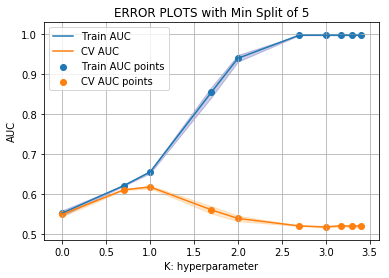

In [114]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=5)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 5")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


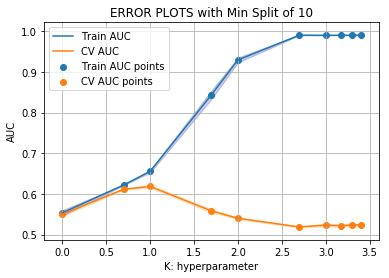

In [115]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=10)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 10")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


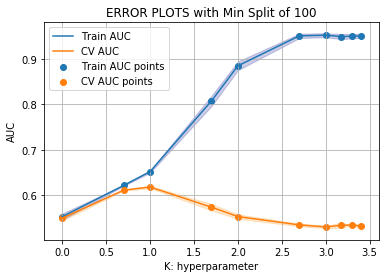

In [116]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=100)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 100")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


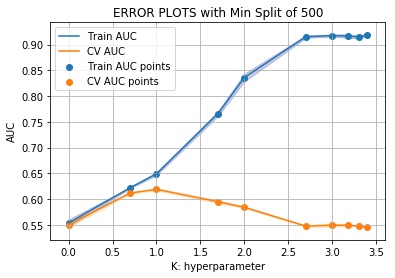

In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=500)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 500")
plt.grid()
plt.show()

In [114]:
def model_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    y_data_pred.extend(clf.predict_proba(data[:])[:,1])
  
    return y_data_pred

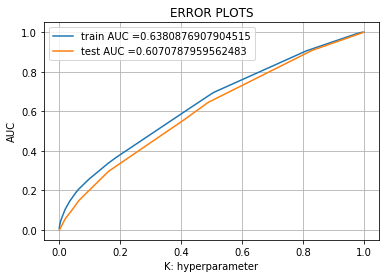

In [115]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
#from sklearn.calibration import CalibratedClassifierCV


clf =DecisionTreeClassifier(max_depth=7,min_samples_split=100,class_weight='balanced')
clf=clf.fit(X_train, labels_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model_predict(clf, X_train)   
y_test_pred = model_predict(clf, X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(labels_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(labels_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [313]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499942828829826 for threshold 0.495


Text(0.5,1,'Confusion Matrix for Train')

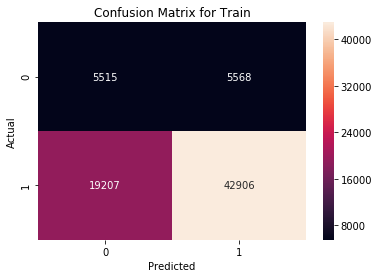

In [117]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm=confusion_matrix(labels_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.heatmap(cm, annot=True, fmt="d" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Train")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.6


Text(0.5,1,'Confusion Matrix for Test')

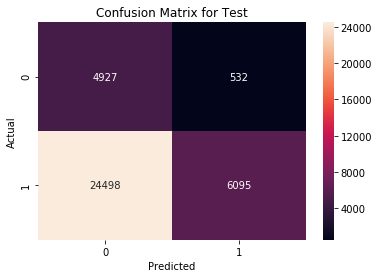

In [118]:
print("Test confusion matrix")
cm1=confusion_matrix(labels_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(cm1, annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Test")

### Visualization

In [155]:
feature_names=[" ", " "]
y=vectorizer5.get_feature_names()
feature_names.extend(y)
#print(feature_names)
y1=vectorizer4.get_feature_names()
feature_names.extend(y1)
#print(feature_names)
y2=vectorizer3.get_feature_names()
feature_names.extend(y2)
#print(feature_names)
y3=vectorizer1.get_feature_names()
feature_names.extend(y3)
#print(feature_names)
y4=vectorizer2.get_feature_names()
feature_names.extend(y4)
#print(feature_names)
y5=vectorizer7.get_feature_names()
feature_names.extend(y5)
#print(feature_names)
y6=vectorizer6.get_feature_names()
feature_names.extend(y6)
#feature_names.extend("Quantity")
#feature_names.extend(price)

#print(len(feature_names))

#feature_names=feature_names[:10101]
print(len(feature_names))

10101


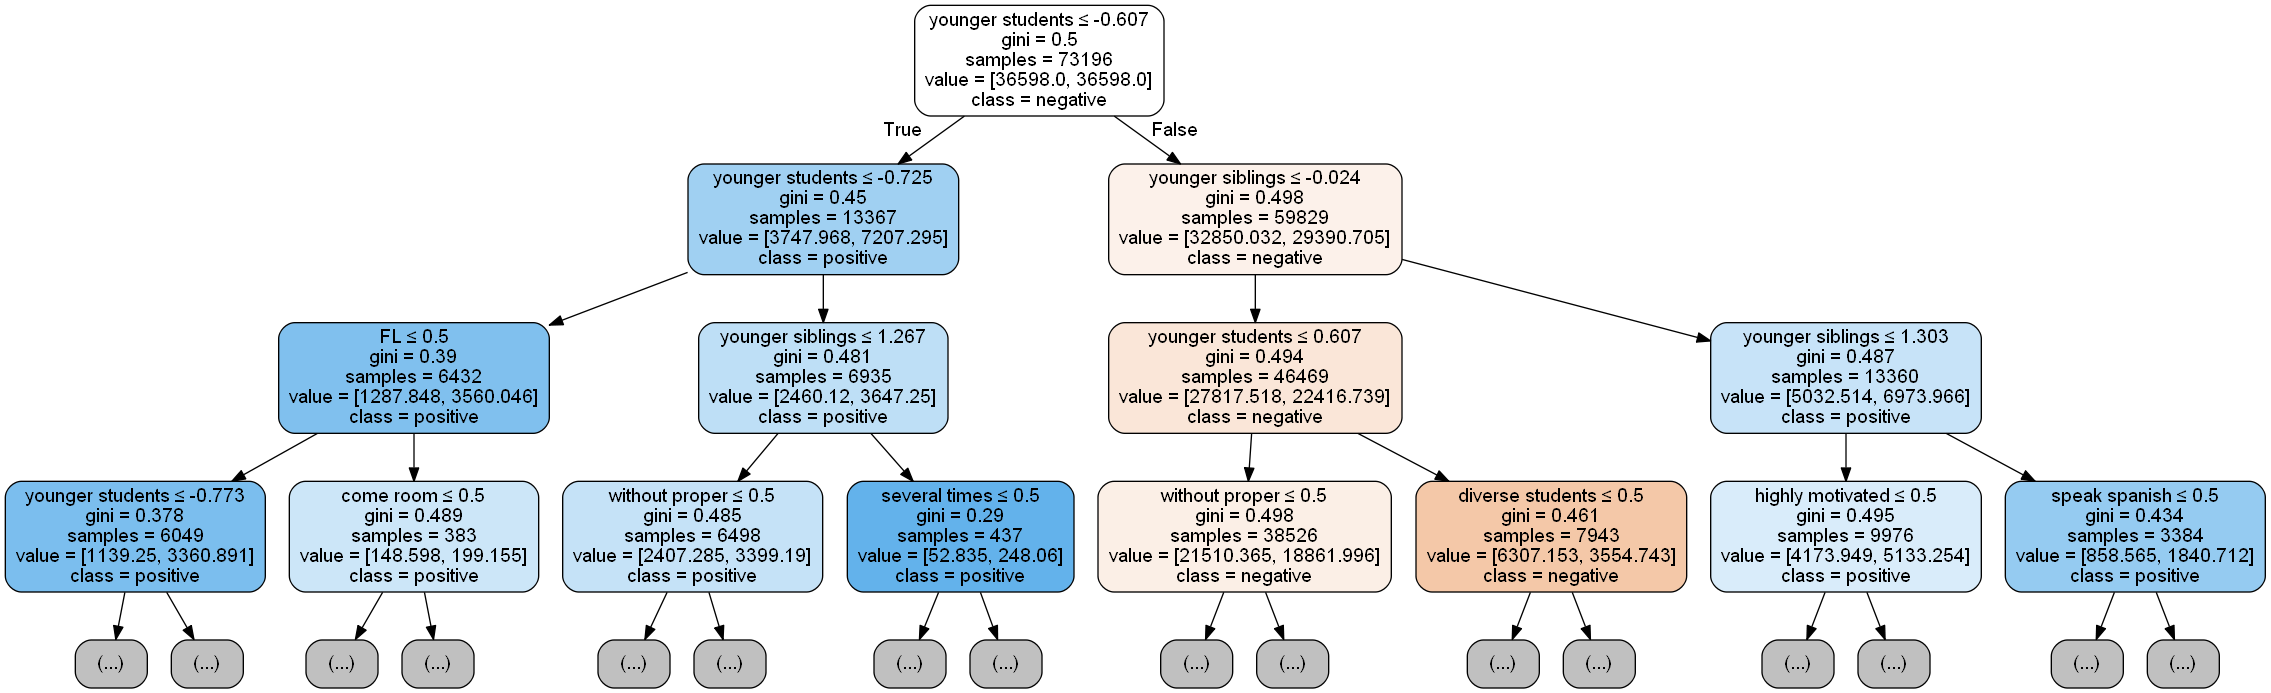

In [156]:
# Importing libraries
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
target = ['negative','positive']
# Create DOT data
data = tree.export_graphviz(clf,out_file=None,class_names=target,filled=True,feature_names=feature_names,rounded=True,special_characters=True, max_depth=3)
# Draw graph
graph = pydotplus.graph_from_dot_data(data)
#graph = Source(data)
# Show graph
Image(graph.create_png())
#display(SVG(graph.pipe(format='svg')))

In [295]:
def prediction(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    y_data_pred.extend(clf.predict(data[:])[:,1])
  
    return y_data_pred

In [396]:
clf_cloud =DecisionTreeClassifier(max_depth=7,min_samples_split=100,class_weight='balanced')
clf_cloud=clf_cloud.fit(X_train, labels_train)
  
y_test_pred_cloud=clf_cloud.predict(X_test)

In [397]:
import numpy as np

labels=list(labels_test)
length=len(labels_test)

#print(labels[1])

for i in range (length):
    if(np.logical_and(labels[i]!= y_test_pred_cloud[i], y_test_pred_cloud[i] == 1)):
        index_false_positives.append(i)
        
    

for i in index_false_positives:
    essays=preprocessed_essays_test[i]



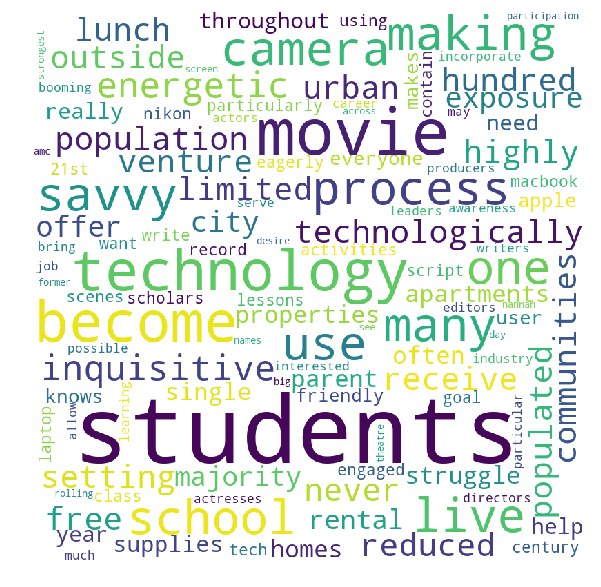

In [398]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essays) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [399]:
price_pdf=[]
for i in index_false_positives:
    price_pdf.append(price[i])
    
#print(price_pdf)
    
#print(len(price_pdf))
    
price_box=pd.DataFrame({'price_pdf': price_pdf})

Text(0.5,1,'Box Plot for Price for False Positive')

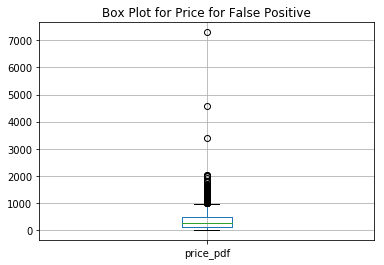

In [400]:
price_box.boxplot()


plt.title("Box Plot for Price for False Positive")

In [401]:
project_pdf=[]
for i in index_false_positives:
    project_pdf.append(project[i])
    
#print(price_pdf)
    
#print(len(project_pdf))
    
project_pdf=pd.DataFrame({'project_pdf': project_pdf})

Text(0.5,1,'PDF for Teacher Previously Posted Projects')

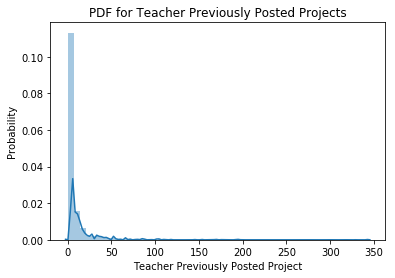

In [402]:
sns.distplot(project_pdf)

plt.xlabel("Teacher Previously Posted Project")
plt.ylabel("Probability")

plt.title("PDF for Teacher Previously Posted Projects")

### Merging Features for TFIDF

In [159]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X1_train = hstack((prefix_one_hot,grade_one_hot,state_one_hot,categories_one_hot,sub_categories_one_hot,teacher_number_of_previously_posted_projects_standardized,price_standardized,text_tfidf,tittle_tfidf)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X1_train.shape

(73196, 10101)

In [160]:
X1_test = hstack((prefix_one_hot_test,grade_one_hot_test,state_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,teacher_number_of_previously_posted_projects_standardized_test,price_standardized_test,text_tfidf_test,title_tfidf_test)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X1_test.shape

(36052, 10101)

### Decision Tree for TFIDF

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


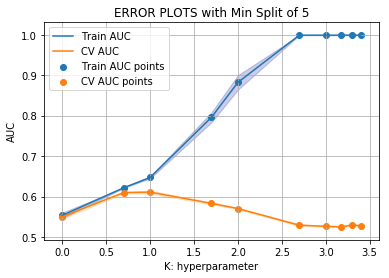

In [133]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=5)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X1_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 5")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


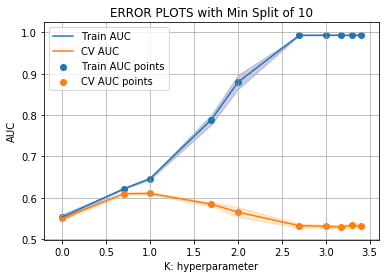

In [134]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=10)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X1_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 10")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


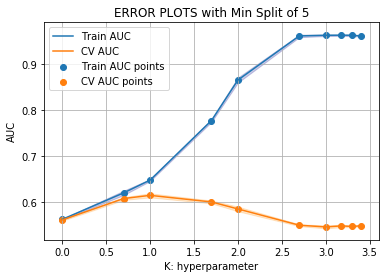

In [150]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=100)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X1_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 100")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


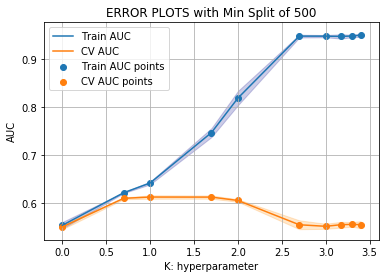

In [136]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=500)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X1_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 500")
plt.grid()
plt.show()

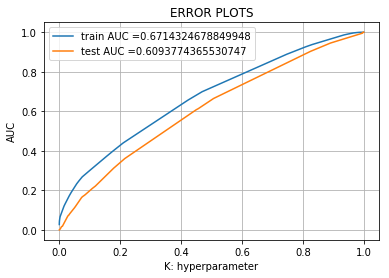

In [176]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#from sklearn.metrics import roc_curve, auc
#from sklearn.calibration import CalibratedClassifierCV


clf_tfidf =DecisionTreeClassifier(max_depth=10,min_samples_split=10,class_weight='balanced')
clf_tfidf=clf_tfidf.fit(X1_train, labels_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model_predict(clf_tfidf, X1_train)   
y_test_pred = model_predict(clf_tfidf, X1_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(labels_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(labels_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24906716962425268 for threshold 0.416


Text(0.5,1,'Confusion Matrix for Train')

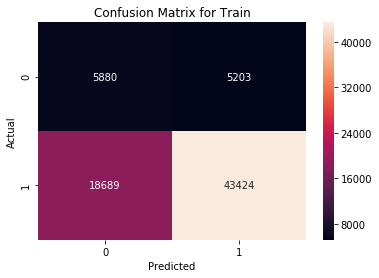

In [162]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm=confusion_matrix(labels_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.heatmap(cm, annot=True, fmt="d" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Train")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24995281148105306 for threshold 0.477


Text(0.5,1,'Confusion Matrix for Test')

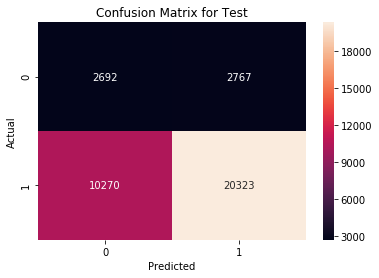

In [163]:
print("Test confusion matrix")
cm1=confusion_matrix(labels_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(cm1, annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Test")

In [164]:
feature_names_tfidf=[" ", " "]
y=vectorizer5.get_feature_names()
feature_names_tfidf.extend(y)
#print(feature_names)
y1=vectorizer4.get_feature_names()
feature_names_tfidf.extend(y1)
#print(feature_names)
y2=vectorizer3.get_feature_names()
feature_names_tfidf.extend(y2)
#print(feature_names)
y3=vectorizer1.get_feature_names()
feature_names_tfidf.extend(y3)
#print(feature_names)
y4=vectorizer2.get_feature_names()
feature_names_tfidf.extend(y4)
#print(feature_names)
y5=vectorizer8.get_feature_names()
feature_names_tfidf.extend(y5)
#print(feature_names)
y6=vectorizer9.get_feature_names()
feature_names_tfidf.extend(y6)

print(len(feature_names_tfidf))

10101


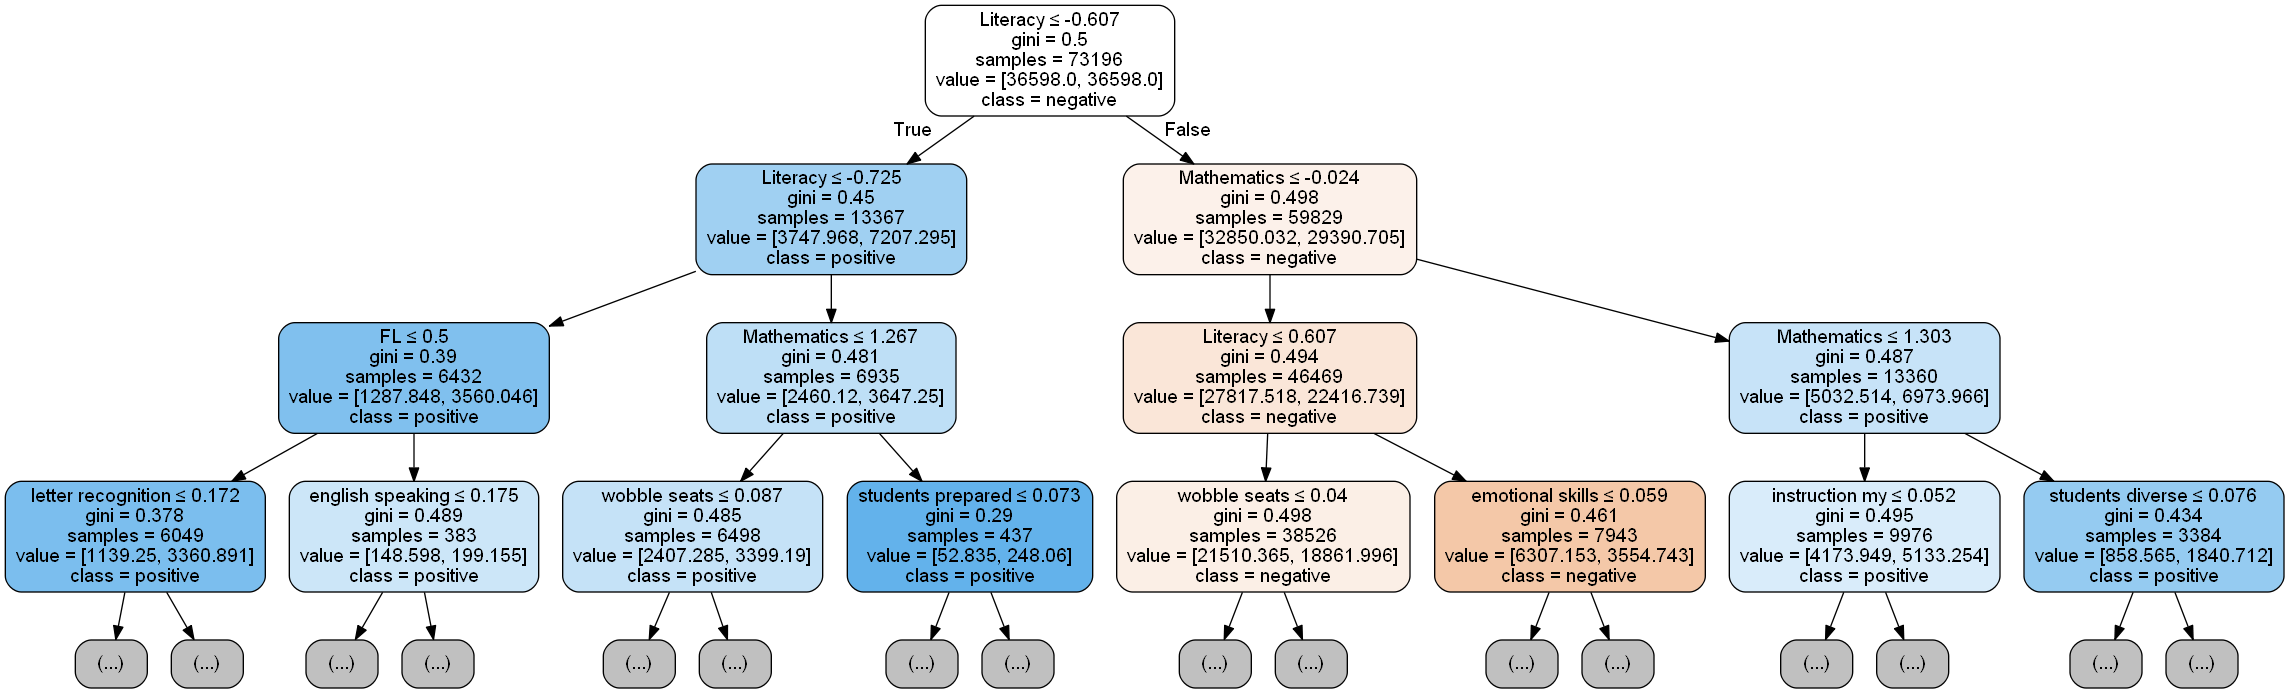

In [165]:
# Importing libraries
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
target = ['negative','positive']
# Create DOT data
data = tree.export_graphviz(clf,out_file=None,class_names=target,filled=True,feature_names=feature_names_tfidf,rounded=True,special_characters=True, max_depth=3)
# Draw graph
graph = pydotplus.graph_from_dot_data(data)
#graph = Source(data)
# Show graph
Image(graph.create_png())
#display(SVG(graph.pipe(format='svg')))

In [403]:
clf_cloud =DecisionTreeClassifier(max_depth=7,min_samples_split=100,class_weight='balanced')
clf_cloud=clf_cloud.fit(X1_train, labels_train)
  
y_test_pred_cloud=clf_cloud.predict(X1_test)

In [404]:
import numpy as np

labels=list(labels_test)
length=len(labels_test)

#print(labels[1])

for i in range (length):
    if(np.logical_and(labels[i]!= y_test_pred_cloud[i], y_test_pred_cloud[i] == 1)):
        index_false_positives.append(i)

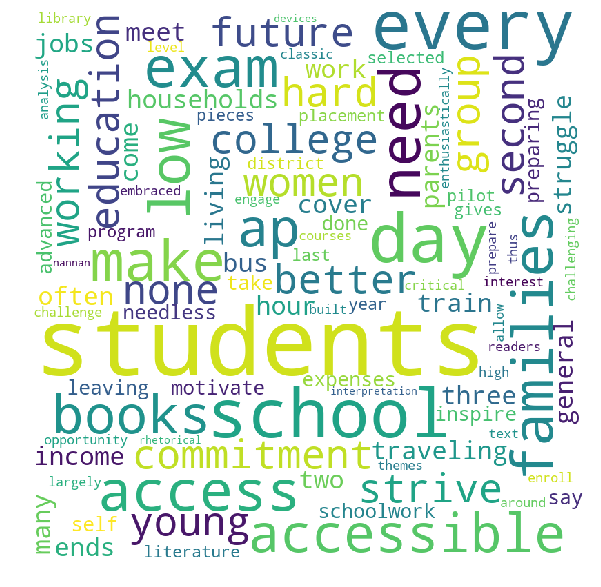

In [405]:
for i in index_false_positives:
    essays=preprocessed_essays_test[i]




from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essays) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 
  


In [409]:
price_pdf=[]
for i in index_false_positives:
    price_pdf.append(price[i])
    
#print(price_pdf)
    
#print(len(price_pdf))
    
price_box=pd.DataFrame({'price_pdf': price_pdf})

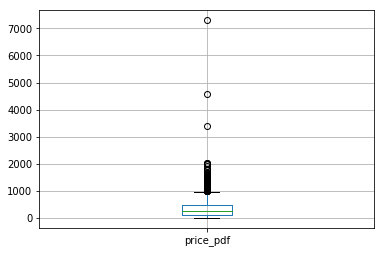

In [410]:
price_box.boxplot()

2918


Text(0.5,1,'PDF for Teacher Previously Posted Projects')

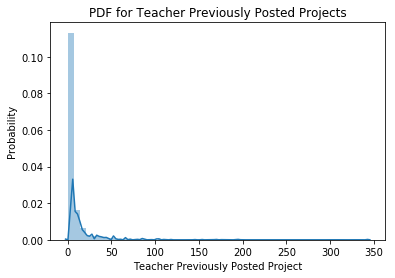

In [411]:
project_pdf=[]
for i in index_false_positives:
    project_pdf.append(project[i])
    
#print(price_pdf)
    
print(len(project_pdf))
    
project_pdf=pd.DataFrame({'project_pdf': project_pdf})

sns.distplot(project_pdf)

plt.xlabel("Teacher Previously Posted Project")
plt.ylabel("Probability")

plt.title("PDF for Teacher Previously Posted Projects")

### Merging Features for AVG W2V

In [303]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X2_train = hstack((prefix_one_hot,grade_one_hot,state_one_hot,categories_one_hot,sub_categories_one_hot,teacher_number_of_previously_posted_projects_standardized,price_standardized,avg_w2v_vectors,avg_w2v_vectors_tittle)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X2_train.shape

(73196, 701)

In [304]:
X2_test = hstack((prefix_one_hot_test,grade_one_hot_test,state_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,teacher_number_of_previously_posted_projects_standardized_test,price_standardized_test,avg_w2v_vectors_test,avg_w2v_vectors_tittle_test)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X2_test.shape

(36052, 701)

### Decision Tree for AVG W2V

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


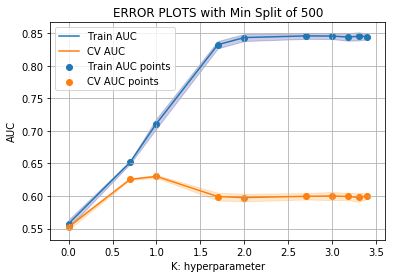

In [147]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=500)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X2_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 500")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


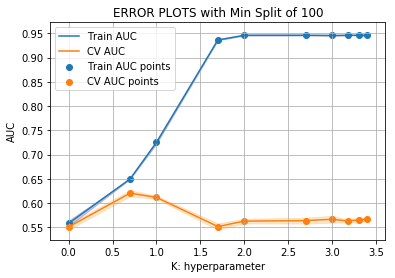

In [121]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=100)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X2_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 100")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


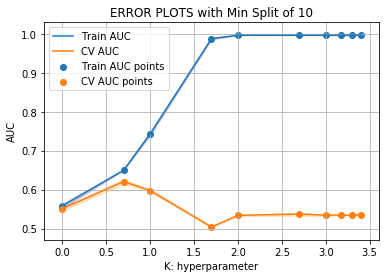

In [122]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=10)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc')
clf.fit(X2_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 10")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


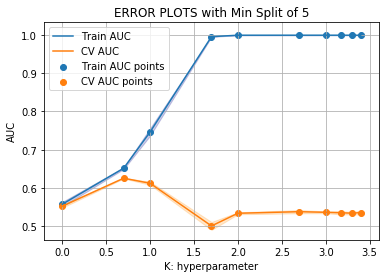

In [149]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=5)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X2_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 5")
plt.grid()
plt.show()

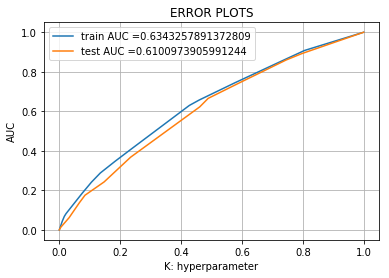

In [153]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#from sklearn.metrics import roc_curve, auc
#from sklearn.calibration import CalibratedClassifierCV


clf =DecisionTreeClassifier(max_depth=4,min_samples_split=10,class_weight='balanced')
clf=clf.fit(X2_train, labels_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model_predict(clf, X2_train)   
y_test_pred = model_predict(clf, X2_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(labels_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(labels_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2483842254984331 for threshold 0.458


Text(0.5,1,'Confusion Matrix for Train')

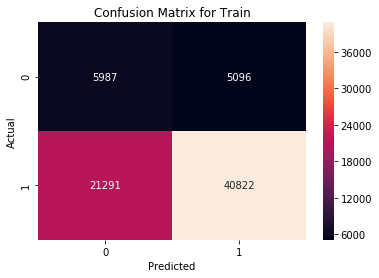

In [154]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm=confusion_matrix(labels_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.heatmap(cm, annot=True, fmt="d" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Train")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2498812023792342 for threshold 0.538


Text(0.5,1,'Confusion Matrix for Test')

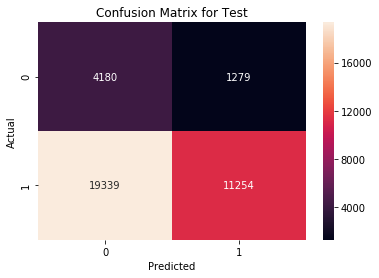

In [155]:
print("Test confusion matrix")
cm1=confusion_matrix(labels_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(cm1, annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Test")

In [412]:
clf_cloud =DecisionTreeClassifier(max_depth=7,min_samples_split=100,class_weight='balanced')
clf_cloud=clf_cloud.fit(X2_train, labels_train)
  
y_test_pred_cloud=clf_cloud.predict(X2_test)

In [413]:
import numpy as np

labels=list(labels_test)
length=len(labels_test)

#print(labels[1])

for i in range (length):
    if(np.logical_and(labels[i]!= y_test_pred_cloud[i], y_test_pred_cloud[i] == 1)):
        index_false_positives.append(i)

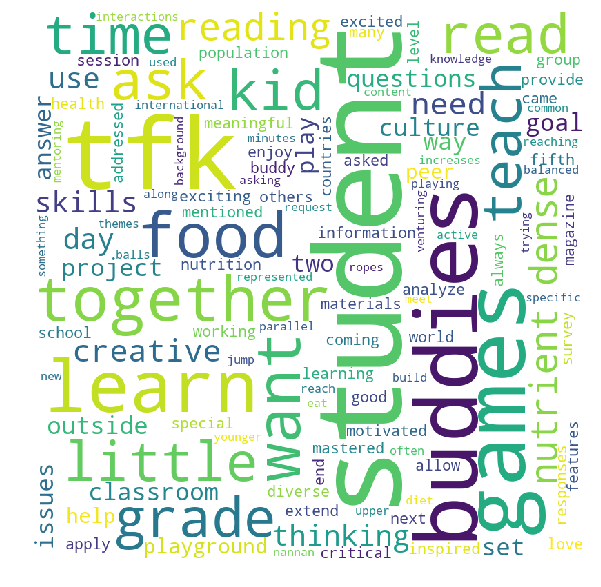

In [414]:
for i in index_false_positives:
    essays=preprocessed_essays_test[i]




from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essays) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

4126


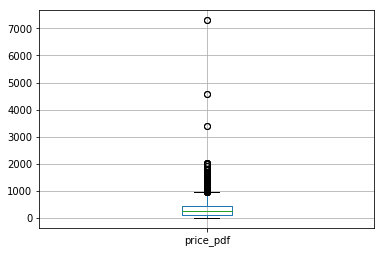

In [415]:
price_pdf=[]
for i in index_false_positives:
    price_pdf.append(price[i])
    
#print(price_pdf)
    
print(len(price_pdf))
    
price_box=pd.DataFrame({'price_pdf': price_pdf})



price_box.boxplot()

4126


Text(0.5,1,'PDF for Teacher Previously Posted Projects')

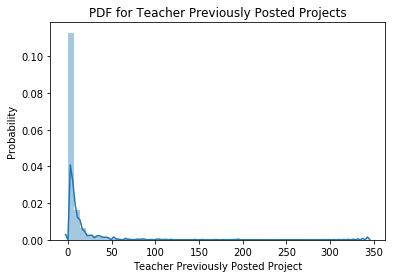

In [416]:
project_pdf=[]
for i in index_false_positives:
    project_pdf.append(project[i])
    
#print(price_pdf)
    
print(len(project_pdf))
    
project_pdf=pd.DataFrame({'project_pdf': project_pdf})

sns.distplot(project_pdf)

plt.xlabel("Teacher Previously Posted Project")
plt.ylabel("Probability")

plt.title("PDF for Teacher Previously Posted Projects")

### Decision Tree for TFIDF W2V

In [167]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X3_train = hstack((prefix_one_hot,grade_one_hot,state_one_hot,categories_one_hot,sub_categories_one_hot,teacher_number_of_previously_posted_projects_standardized,price_standardized,tfidf_w2v_vectors,tfidf_w2v_vectors_Title)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X3_train.shape

(73196, 701)

In [168]:
X3_test = hstack((prefix_one_hot_test,grade_one_hot_test,state_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,teacher_number_of_previously_posted_projects_standardized_test,price_standardized_test,tfidf_w2v_vectors_test,tfidf_w2v_vectors_Title_test)).tocsr()  #https://www.kaggle.com/c/quora-question-pairs/discussion/33491 taken from
X3_test.shape

(36052, 701)

### Decision Tree for TFIDF W2V

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


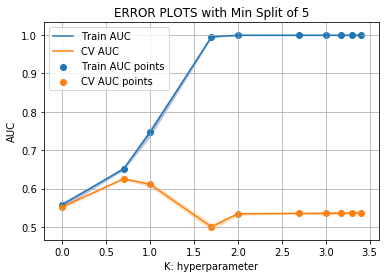

In [162]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=5)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X3_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 5")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


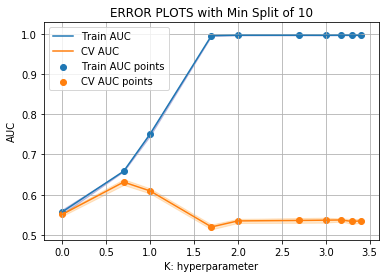

In [163]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=10)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X3_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 10")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


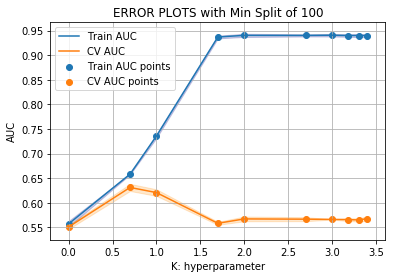

In [164]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=100)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X3_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 100")
plt.grid()
plt.show()

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0                1                 0.000000
1                5                 0.698970
2               10                 1.000000
3               50                 1.698970
4              100                 2.000000
5              500                 2.698970
6             1000                 3.000000
7             1500                 3.176091
8             2000                 3.301030
9             2500                 3.397940


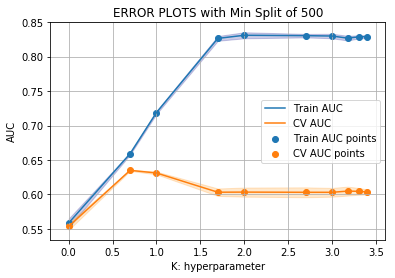

In [169]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = DecisionTreeClassifier(min_samples_split=500)

import math

parameter_data = [1, 5, 10, 50, 100, 500, 1000,1500,2000,2500]

log_my_data = [math.log10(x) for x in parameter_data]

print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'max_depth':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X3_train, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with Min Split of 500")
plt.grid()
plt.show()

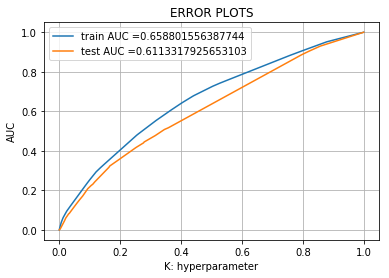

In [172]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#from sklearn.metrics import roc_curve, auc
#from sklearn.calibration import CalibratedClassifierCV


clf =DecisionTreeClassifier(max_depth=5,min_samples_split=10,class_weight='balanced')
clf=clf.fit(X3_train, labels_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model_predict(clf, X3_train)   
y_test_pred = model_predict(clf, X3_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(labels_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(labels_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998387850341938 for threshold 0.434


Text(0.5,1,'Confusion Matrix for Train')

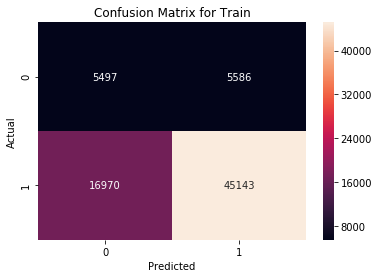

In [173]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm=confusion_matrix(labels_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.heatmap(cm, annot=True, fmt="d" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Train")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.22997508009967962 for threshold 0.381


Text(0.5,1,'Confusion Matrix for Test')

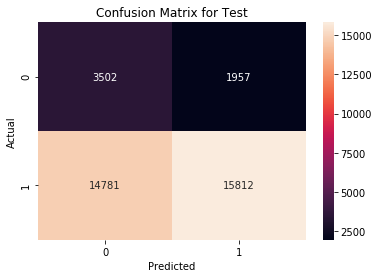

In [174]:
print("Test confusion matrix")
cm1=confusion_matrix(labels_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(cm1, annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Test")

In [417]:
clf_cloud =DecisionTreeClassifier(max_depth=7,min_samples_split=100,class_weight='balanced')
clf_cloud=clf_cloud.fit(X3_train, labels_train)
  
y_test_pred_cloud=clf_cloud.predict(X3_test)
#print(y_test_pred_cloud[10])



import numpy as np

labels=list(labels_test)
length=len(labels_test)

#print(labels[1])

for i in range (length):
    if(np.logical_and(labels[i]!= y_test_pred_cloud[i], y_test_pred_cloud[i] == 1)):
        index_false_positives.append(i)
        


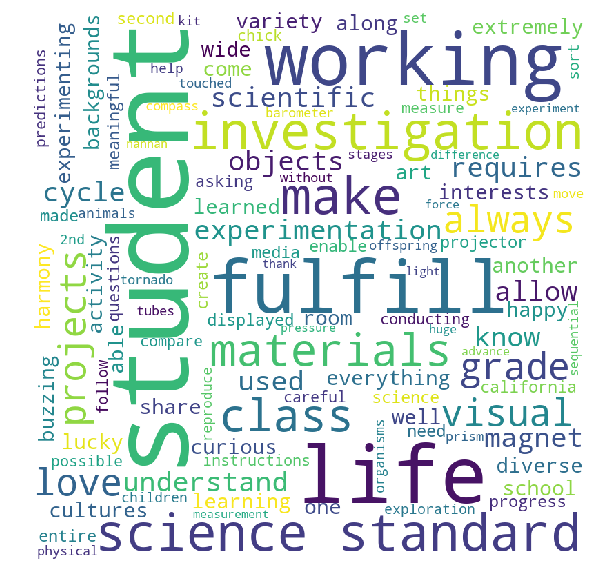

In [418]:
for i in index_false_positives:
    essays=preprocessed_essays_test[i]




from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essays) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

4405


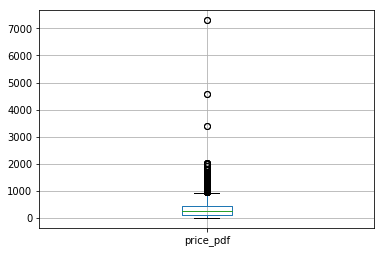

In [419]:
price_pdf=[]
for i in index_false_positives:
    price_pdf.append(price[i])
    
#print(price_pdf)
    
print(len(price_pdf))
    
price_box=pd.DataFrame({'price_pdf': price_pdf})



price_box.boxplot()

4405


Text(0.5,1,'PDF for Teacher Previously Posted Projects')

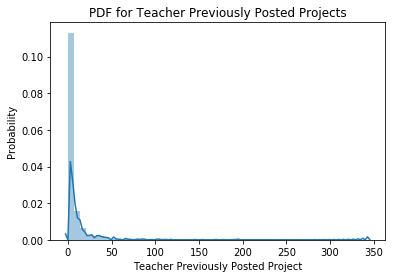

In [420]:
project_pdf=[]
for i in index_false_positives:
    project_pdf.append(project[i])
    
#print(price_pdf)
    
print(len(project_pdf))
    
project_pdf=pd.DataFrame({'project_pdf': project_pdf})

sns.distplot(project_pdf)

plt.xlabel("Teacher Previously Posted Project")
plt.ylabel("Probability")

plt.title("PDF for Teacher Previously Posted Projects")

### Using Feature Importance

In [182]:
#https://stackoverflow.com/questions/55485231/how-to-prepare-my-dataset-after-selecting-top-5k-features-original-shape-was-24

k = 5000
ind = clf_tfidf.feature_importances_.argsort()[-k:][::-1]
X1_train_shortlisted = X1_train[:,ind]
X1_test_shortlisted =X1_test[:,ind]

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from math import log

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0           0.0001                -4.000000
1           0.0010                -3.000000
2           0.0100                -2.000000
3           0.1000                -1.000000
4           1.0000                 0.000000
5           5.0000                 0.698970
6          10.0000                 1.000000
7          20.0000                 1.301030
8          30.0000                 1.477121
9          40.0000                 1.602060


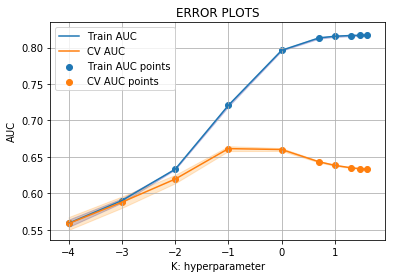

In [188]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

C = LogisticRegression()

import math

parameter_data = [0.0001,0.001,0.01,0.1,1,5,10,20,30,40]

log_my_data = [math.log10(x) for x in parameter_data]

#print(log_my_data)
print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)
parameters = {'C':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc')
clf.fit(X1_train_shortlisted, labels_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')
plt.scatter(log_my_data, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

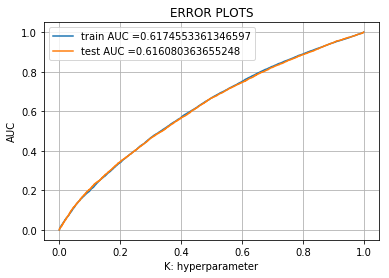

In [189]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=0.0005,class_weight='balanced')
neigh.fit(X1_train_shortlisted, labels_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model_predict(neigh, X1_train_shortlisted)   
y_test_pred = model_predict(neigh, X1_test_shortlisted)


train_fpr, train_tpr, tr_thresholds = roc_curve(labels_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(labels_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999979647145 for threshold 0.489


Text(0.5,1,'Confusion Matrix for Train')

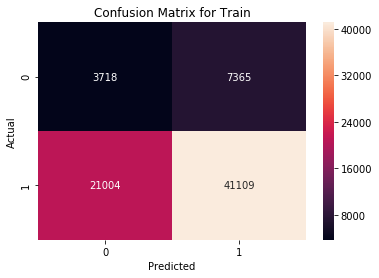

In [314]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm=confusion_matrix(labels_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.heatmap(cm, annot=True, fmt="d" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Train")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.525


Text(0.5,1,'Confusion Matrix for Test')

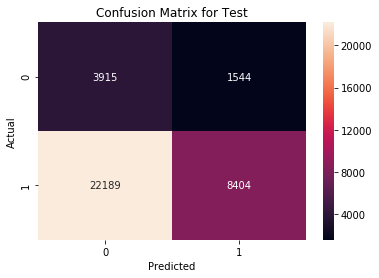

In [315]:
print("Test confusion matrix")
cm1=confusion_matrix(labels_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(cm1, annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Test")

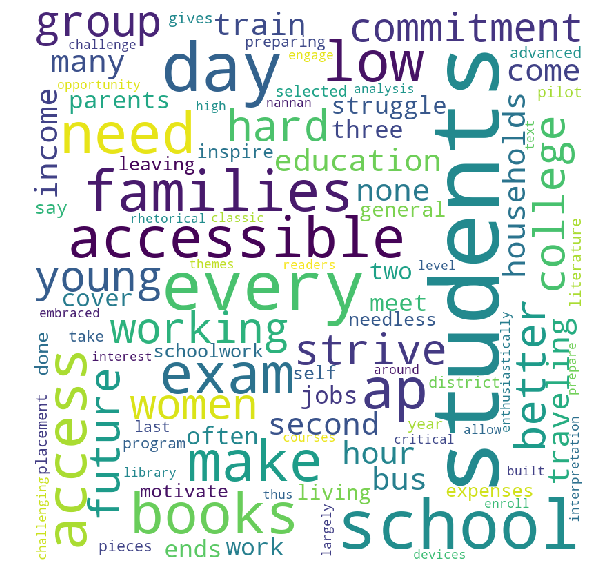

In [421]:
clf_cloud =DecisionTreeClassifier(max_depth=7,min_samples_split=100,class_weight='balanced')
clf_cloud=clf_cloud.fit(X1_train_shortlisted, labels_train)
  
y_test_pred_cloud=clf_cloud.predict(X1_test_shortlisted)
#print(y_test_pred_cloud[10])



import numpy as np

labels=list(labels_test)
length=len(labels_test)

#print(labels[1])

for i in range (length):
    if(np.logical_and(labels[i]!= y_test_pred_cloud[i], y_test_pred_cloud[i] == 1)):
        index_false_positives.append(i)
        
    

for i in index_false_positives:
    essays=preprocessed_essays_test[i]




from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essays) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

4537


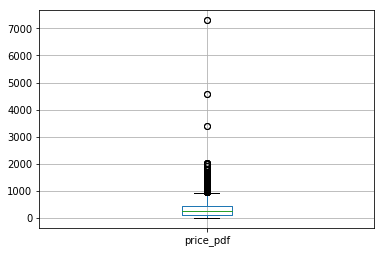

In [422]:
price_pdf=[]
for i in index_false_positives:
    price_pdf.append(price[i])
    
#print(price_pdf)
    
print(len(price_pdf))
    
price_box=pd.DataFrame({'price_pdf': price_pdf})



price_box.boxplot()

4537


Text(0.5,1,'PDF for Teacher Previously Posted Projects')

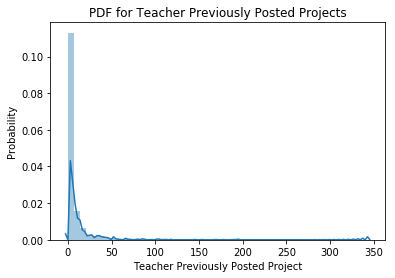

In [423]:
project_pdf=[]
for i in index_false_positives:
    project_pdf.append(project[i])
    
#print(price_pdf)
    
print(len(project_pdf))
    
project_pdf=pd.DataFrame({'project_pdf': project_pdf})

sns.distplot(project_pdf)

plt.xlabel("Teacher Previously Posted Project")
plt.ylabel("Probability")

plt.title("PDF for Teacher Previously Posted Projects")

### Pretty Table

In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model","Split", "Hyperparameter", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Brute(Decision Tree)","100", 7 , 63, 61])
x.add_row(["TFIDF", "Brute(Decision Tree)","10", 10, 67, 61])
x.add_row(["AVG W2V", "Brute(Decision Tree)","10", 10, 63, 61 ])
x.add_row(["TFIDF W2V", "Brute(Decision Tree)","10", 10, 65, 61 ])
x.add_row(["Set 5", "Brute(Logistic Regression)","NA", 0.0005, 61, 61 ])
print(x)

+------------+----------------------------+-------+----------------+-----------+----------+
| Vectorizer |           Model            | Split | Hyperparameter | Train AUC | Test AUC |
+------------+----------------------------+-------+----------------+-----------+----------+
|    BOW     |    Brute(Decision Tree)    |  100  |       7        |     63    |    61    |
|   TFIDF    |    Brute(Decision Tree)    |   10  |       10       |     67    |    61    |
|  AVG W2V   |    Brute(Decision Tree)    |   10  |       10       |     63    |    61    |
| TFIDF W2V  |    Brute(Decision Tree)    |   10  |       10       |     65    |    61    |
|   Set 5    | Brute(Logistic Regression) |   NA  |     0.0005     |     61    |    61    |
+------------+----------------------------+-------+----------------+-----------+----------+
